# Table of Contents
- Importing libraries
- Measuring Correlation
- Creating a scatterplot chart
- Creating a Pair plot chart
- Creating a Categorical chart
- Question 7: Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.
- Question 8: Define any hypotheses that you can at this point. You’ll be testing these later on.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'C:\Users\alexa\OneDrive\Documents\data analytics\Achievement 6'

In [3]:
df_voter = pd.read_csv(os.path.join(path, 'Main', 'idea_voter_clean.csv'), index_col = False)

In [4]:
%matplotlib inline

# Measuring Correlations

In [5]:
# Create a correlation matrix 
df_voter.corr()

,Year,Voter Turnout,Total vote,Registration,VAP Turnout,Voting age population,Population,Invalid votes
Year,1.000000,-0.086641,0.027622,0.028871,-0.084454,0.030511,0.023634,0.053961
Voter Turnout,-0.086641,1.000000,0.056270,-0.014762,0.728251,-0.016017,-0.022038,-0.000298
Total vote,0.027622,0.056270,1.000000,0.988178,0.075731,0.980040,0.975030,0.052183
Registration,0.028871,-0.014762,0.988178,1.000000,0.016947,0.993310,0.991590,0.039498
VAP Turnout,-0.084454,0.728251,0.075731,0.016947,1.000000,-0.005228,-0.013309,-0.011257
Voting age population,0.030511,-0.016017,0.980040,0.993310,-0.005228,1.000000,0.993625,0.036466
Population,0.023634,-0.022038,0.975030,0.991590,-0.013309,0.993625,1.000000,0.042482
Invalid votes,0.053961,-0.000298,0.052183,0.039498,-0.011257,0.036466,0.042482,1.000000


In [6]:
# creating subset
df_subset = df_voter [['Year', 'Voter Turnout', 'Registration', 'VAP Turnout', 'Voting age population', 'Population', 'Invalid votes']]

Text(0.5, 1.0, 'Correlation Matrix')

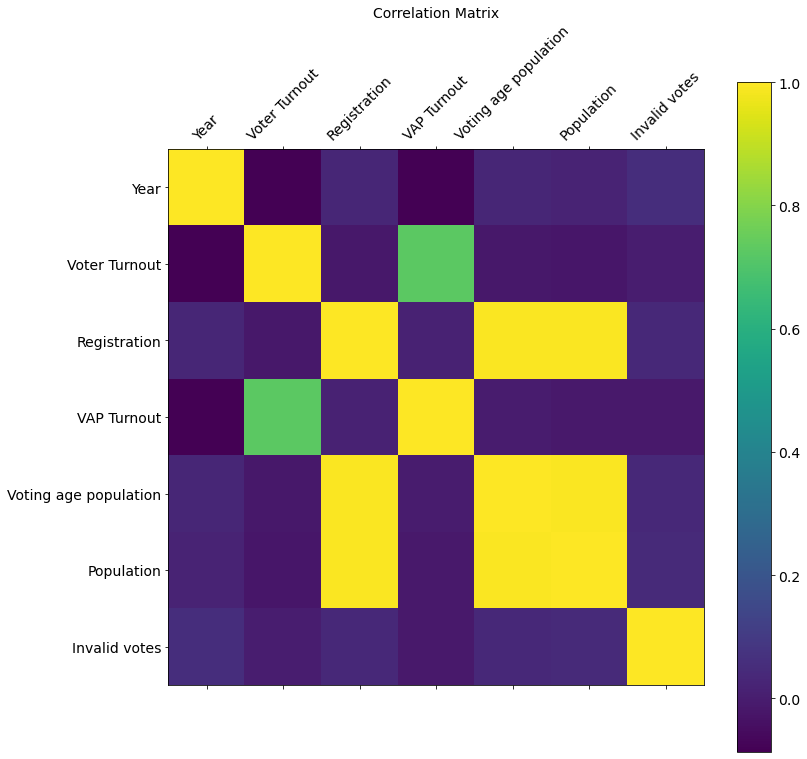

In [8]:
#creating a correlation heatmap
f = plt.figure(figsize=(12, 12))  
plt.matshow(df_subset.corr(), fignum=f.number) 
plt.xticks(range(df_subset.shape[1]), df_subset.columns, fontsize=14, rotation=45) 
plt.yticks(range(df_subset.shape[1]), df_subset.columns, fontsize=14) 
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14) 

From what we can see in the heatmap we have a medium correlation between VAP turnout & Voter turn out, high correlation between Voting age population & registration, population & registration, voting age population & population

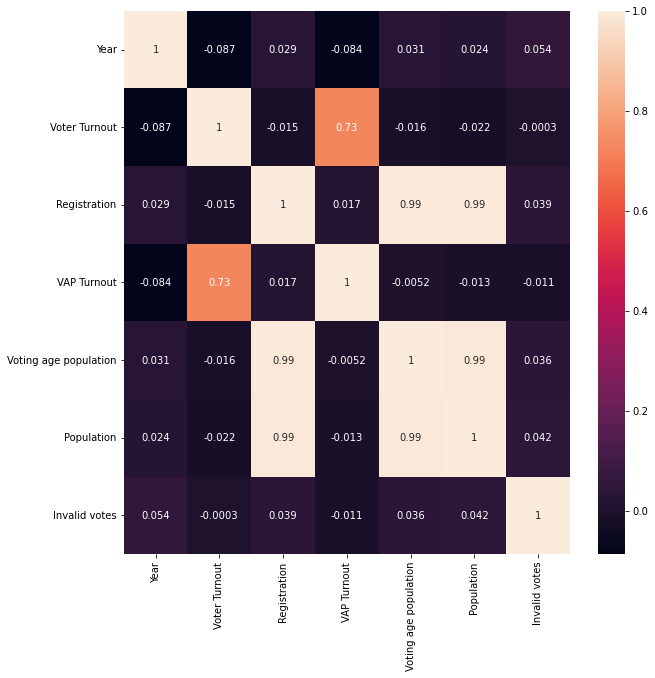

In [10]:
#Subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df_subset.corr(), annot = True, ax = ax) 

# Creating a scatterplot

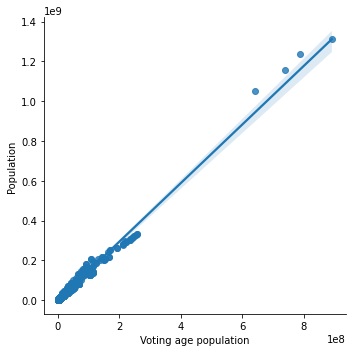

In [11]:
# Create a scatterplot for voting age population & population columns in seaborn
sns.lmplot(x = 'Voting age population', y = 'Population', data = df_subset)

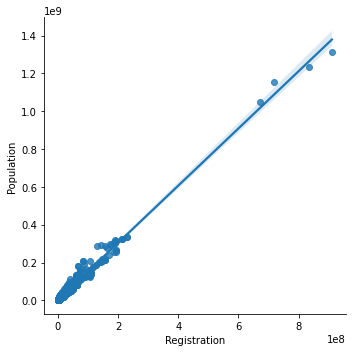

In [12]:
# Create a scatterplot for population & registration columns in seaborn
sns.lmplot(x = 'Registration', y = 'Population', data = df_subset)

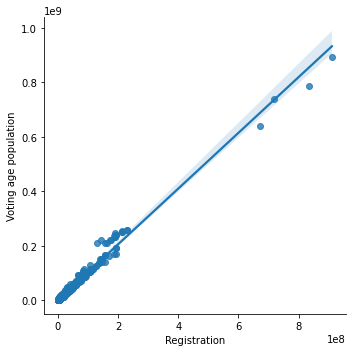

In [13]:
# Create a scatterplot for Voting age population & registration columns in seaborn
sns.lmplot(x = 'Registration', y = 'Voting age population', data = df_subset)

All three scatter plot charts show that they have a positive relation since they are close to the line. We can also see that all three have outliers but all in the similar range.

# Pair plots

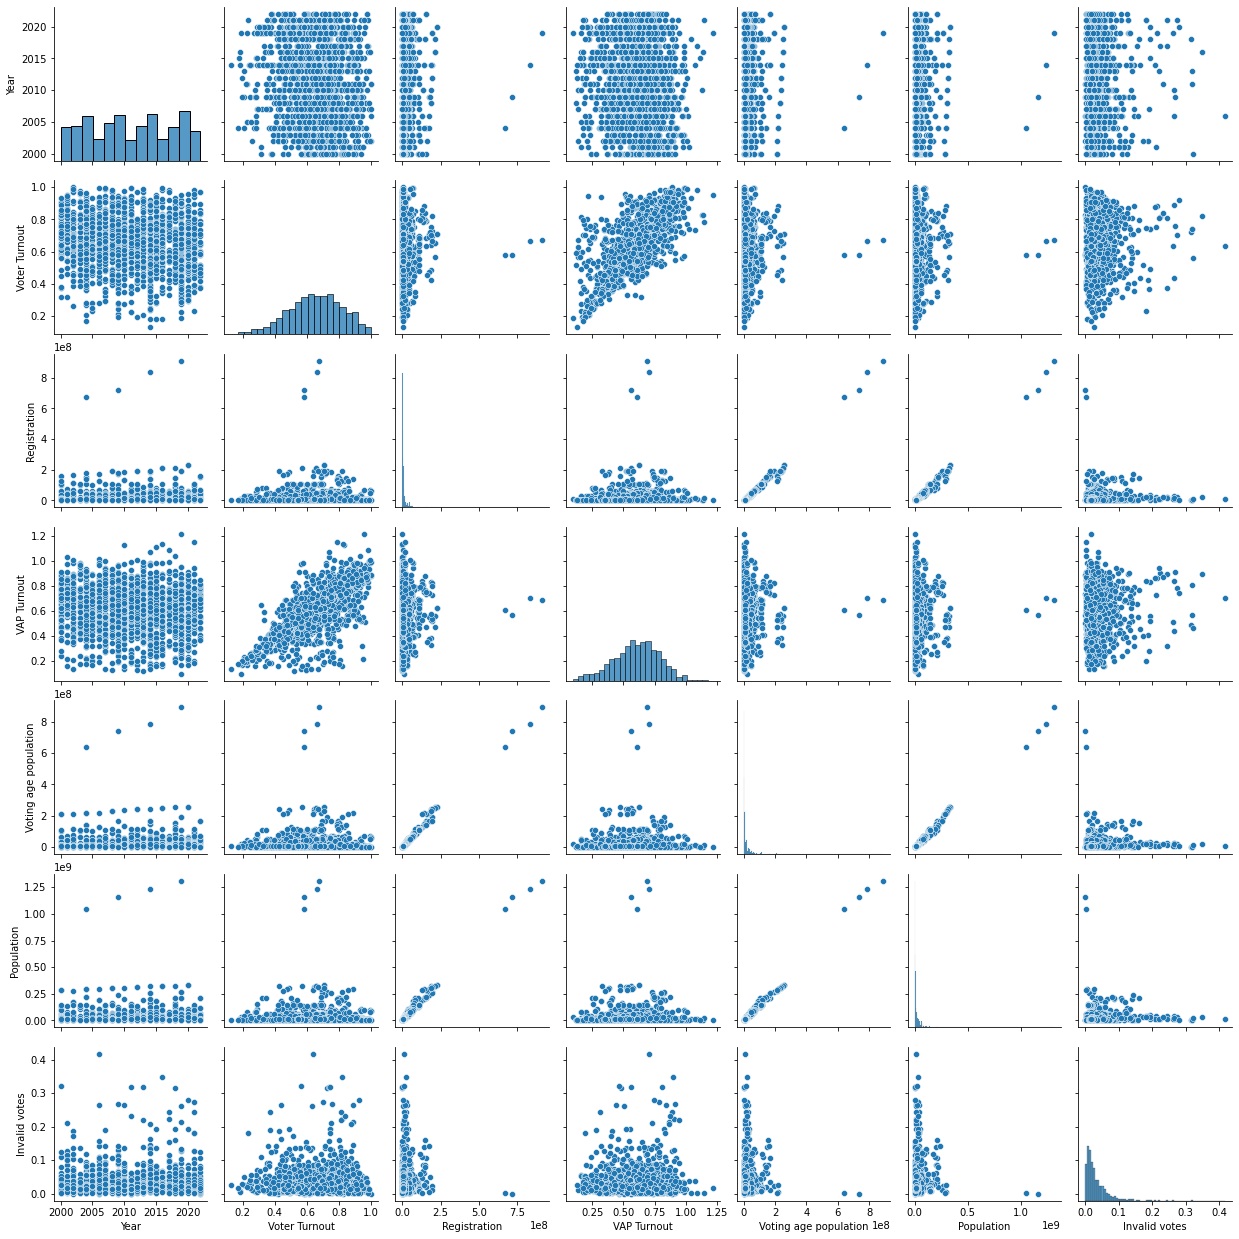

In [14]:
# Create a pair plot 
g = sns.pairplot(df_subset)

comments:
i would say that those with a better relationship are VAP turnout & year, Voter turnout & year, VAP turn out & voter turnout.

# Creating a Categorical chart

<AxesSubplot:xlabel='Voter Turnout', ylabel='Count'>

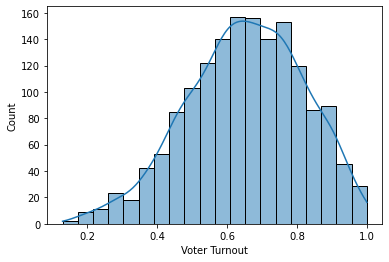

In [15]:
sns.histplot(df_voter['Voter Turnout'], bins = 20, kde = True)

In [16]:
df_voter.loc[(df_voter['Voter Turnout'] >= 0) & (df_voter['Voter Turnout'] < 0.3999), 'Turnout category'] = 'Low turnout'

In [17]:
df_voter.loc[(df_voter['Voter Turnout'] >= 0.4) & (df_voter['Voter Turnout'] < 0.6999), 'Turnout category'] = 'Average turnout'

In [18]:
df_voter.loc[df_voter['Voter Turnout'] >= 0.7, 'Turnout category'] = 'High turnout'

In [19]:
df_voter['Turnout category'].value_counts(dropna = False)

Average turnout    826
High turnout       643
Low turnout        114
NaN                 43
Name: Turnout category, dtype: int64

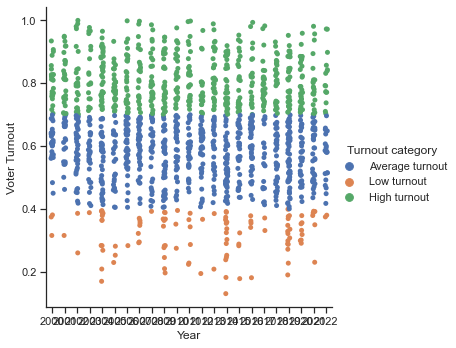

In [22]:
# Create a categorical plot in seaborn using the "Turnout category" defined above
sns.set(style="ticks")
g = sns.catplot(y="Voter Turnout", x="Year", hue='Turnout category', data=df_voter)

Based on the scatterplot above we can see that in the early 2000 there were more average to high turnouts but stil less dots than later in the decades. The more we progress in the 2000s we can see there are more lower turnouts but the average to high still have more but we can see there are more dots the more we progress in the years. Is that due to more elections?

# Question 7: Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

 Here is what defined earlier: Goal: To see if voter turnout has decreased over the years.
 based on the charts above we can see that there are strong relationships between, the year, the voting age population and the voter turnout.
 I expected there to be a better relationship between the voting age population and the registration. One thing to investiage is to see if there are more recorded elections in the later half of the 2000 because i can see there are more low turnouts but there seems to be more elections that take place.

# Question 8: Define any hypotheses that you can at this point. You’ll be testing these later on.

Based on my comment above, if there are more elections that are taking place, the citizens could be experiencing voter fatigue instead of none engagement. therefore maybe analyzing if there is an increase in the number of elections per country.